<a href="https://colab.research.google.com/github/mahsaghaderan99/MLP/blob/backpropagation/mlp123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep MLP project

#Part1

##Import

In [1]:
import tensorflow as tf
from keras.utils.np_utils import to_categorical  
from os import path, getcwd, chdir
import numpy as np
import matplotlib.pyplot as plt

##Layer

In [2]:
class Layer:
  def __init__(self,node_number,activation):
    
    self.node_num = node_number
    self.delta = np.empty(node_number)
    self.vj = np.empty(node_number)
    self.outj = np.empty(node_number)
    self.b = np.zeros((self.node_num)) 
    if activation == 'sigmoid':
      self.activation = self._sigmoid
      self.d_activation = self._d_sigmoid 
    elif activation == 'relu':
      self.activation = self._relu
      self.d_activation =  self._d_relu
    else:
      self.activation = self._none
      self.d_activation = self._none
      
  def define_weights(self,input_shape):
    self.weights = np.random.uniform(low=0, high=0.01, size=(self.node_num,input_shape))

  def _sigmoid(self,x):
    return np.power(1+np.exp(-1*x),-1)
    
  def _d_sigmoid(self,x):
    return self._sigmoid(x)*(1-self._sigmoid(x))

  def _relu(self,x):
    return x*(x>0)

  def _d_relu(self,x):
    return 1.*(x>0)

  def _none(self,x):
    return x
   

##Model

In [108]:
class Model:
  def __init__(self,learning_rate,epochs):
    self.layers = np.empty(0,dtype=Layer)
    self.lr = learning_rate
    self.epochs = epochs

  def Dense(self,node_number,activation_function):
    self.layers = np.append(self.layers,Layer(node_number,activation_function))

  def Train(self,training,training_y):
    try:
      self.training = training.reshape(training.shape[0],training.shape[1]*training.shape[2])
    except:
      self.training = np.expand_dims(training,1)
    self.desiered_labels = training_y
    self._define_weights()
    errors = []
    epoch = 1
    sample_num = self.training.shape[0]
    while self.epochs>=epoch:
      err = 0
      for tr in range(0,sample_num):
        yhat = self._forward_propagation(tr)
        err += (self._update_weights(tr)/sample_num)
      if epoch %10 == 0:
        print(epoch,'-------total error:',err)
      epoch +=1
      errors.append(err)
    return errors

  def _define_weights(self):
    self.layers[0].define_weights(self.training[0].shape[0])
    for i in range(1,self.layers.shape[0]):
      self.layers[i].define_weights(self.layers[i-1].node_num)

  def _forward_propagation(self,tr):
    yhat = self._layer_output(self.training[tr] ,0)
    for i in range(1,self.layers.shape[0]):
      yhat = self._layer_output(yhat ,i)
    # print( yhat)
    return yhat

  def _layer_output(self,x,i):
    yhat = np.dot(self.layers[i].weights,x) + self.layers[i].b
    if i!= self.layers.shape[0]:
      yhat = self.layers[i].activation(yhat)
    self.layers[i].yj = yhat
    return yhat

  def _update_weights(self,tr):
    err = np.sum(np.power(self.desiered_labels[tr]-self.layers[-1].yj,2))/2
    fiprim = self.layers[-1].d_activation(self.layers[-1].yj)
    fiprim = np.expand_dims(fiprim,1).T
    self.layers[-1].delta  = (fiprim * (self.desiered_labels[tr]-self.layers[-1].yj))
    # print(self.layers[-1].delta.shape)
    for i in range(len(self.layers)-2,-1,-1):
      self._delta(i,tr)
    for i in range(len(self.layers)-1,-1,-1):
      if i == 0:
        yj = np.expand_dims(self.training[tr],1)
      else:
        yj =np.expand_dims(self.layers[i-1].yj,1)
      delta = self.layers[i].delta
      deltaw = self.lr * delta *yj
      self.layers[i].weights = self.layers[i].weights + deltaw
      self.layers[i].b = self.layers[i].b + np.sum(deltaw,1)
      return err

  def _delta(self,i,tr):
    next_layer = self.layers[i].yj
    fiprim =  self.layers[i].d_activation(next_layer)
    fiprim = np.expand_dims(fiprim,1)
    sum_delta_w = np.sum((self.layers[i].weights*self.layers[i].delta).T,1)
    self.layers[i].delta =  (fiprim * sum_delta_w).T

  def Predict(self,test_images):
    try:
      testings = test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])
    except:
      testings = test_images
    predicts = []
    for t in range(0,testings.shape[0]):
      yhat = self._layer_output(testings[t] ,0)
      for i in range(1,self.layers.shape[0]):
        yhat = self._layer_output(yhat ,i)
      predicts.append(yhat[0][0])
    return np.array(predicts)

  def Evaluate(self,x,y):
    predictions = self.Predict(x)
    return np.sum(np.power(predictions-y,2))/2, np.sum(np.abs(predictions-y))/y.shape[0]

#Part2

##easy 

In [146]:
x = np.linspace(0,1,202,dtype=np.float16)
xcopy = np.linspace(0,1,202,dtype=np.float16)
# ycopy = np.sin(xcopy)
np.random.shuffle(x)
# y = np.sin(x)
y = 2*x+1.5
ycopy = 2*xcopy+1.5

10 -------total error: 0.03688557409817662
20 -------total error: 0.03688557409817662
30 -------total error: 0.03688557409817662
40 -------total error: 0.03688557409817662
50 -------total error: 0.03688557409817662
60 -------total error: 0.03688557409817662
70 -------total error: 0.03688557409817662
80 -------total error: 0.03688557409817662
90 -------total error: 0.03688557409817662
100 -------total error: 0.03688557409817662
110 -------total error: 0.03688557409817662
120 -------total error: 0.03688557409817662
130 -------total error: 0.03688557409817662
140 -------total error: 0.03688557409817662
150 -------total error: 0.03688557409817662
160 -------total error: 0.03688557409817662
170 -------total error: 0.03688557409817662
180 -------total error: 0.03688557409817662
190 -------total error: 0.03688557409817662
200 -------total error: 0.03688557409817662
(12.305150114361904, 0.3478136864469897)
[1.89829469 1.90774098 1.91718727 1.92663357 1.93607986 1.94552616
 1.95497245 1.9644187

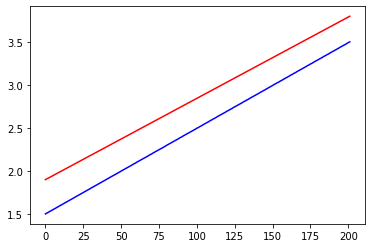

In [147]:
a = Model(0.5,200)
# a.Dense(5,'relu')
# a.Dense(5,'relu')
# a.Dense(50,'sigmoid')
a.Dense(1,'None') 
err = a.Train(x,y)
print(a.Evaluate(x, y))
p = a.Predict(xcopy)
print(p)
plt.plot(p,'r')
plt.plot(ycopy,'b')
# plt.plot(xcopy,'b')
plt.show()

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 11.6850
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 10.7773
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 9.9108
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 9.0861
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 8.3037
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 7.5641
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8674
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.2137
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 5.6029
Epoch 10/100
1/1 [==============================] - 0s 970us/step - loss: 5.0345
Epoch 11/100
1/1 [==============================] - 0s 954us/step - loss: 4.5081
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 4.0227
Epoch 13/100
1/1 [==============================] - 0s 

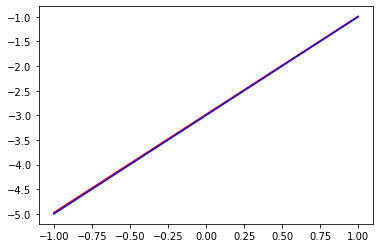

1/1 [==============================] - 0s 3ms/step - loss: 4.3474e-04
0.0004347409412730485


In [118]:
model = tf.keras.models.Sequential([
        # tf.keras.layers.Dense(50,activation='sigmoid'),
        # tf.keras.layers.Dense(50,activation='sigmoid'),
        tf.keras.layers.Dense(1,)
])
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss ='mean_squared_error',optimizer = opt)
history = model.fit(x,y,epochs=100)
p = model.predict(xcopy)
plt.plot(xcopy,p,'r')
plt.plot(xcopy,ycopy,'b')
plt.show()
print(model.evaluate(x, y))

20


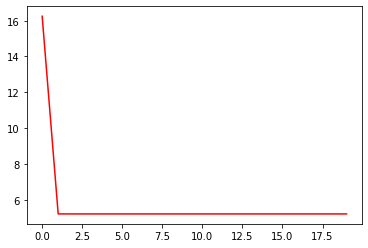

In [ ]:
#show classificaion and error
import matplotlib.pyplot as plt
err = np.array(err)
nerr =np.arange(0,err.shape[0])
print(err.shape[0]) 
plt.plot(nerr,err,'r')
plt.show()

#med

In [44]:
index

array([  1,   5,   7,   7,   9,  13,  13,  18,  18,  21,  38,  43,  49,
        51,  52,  60,  62,  69,  70,  72,  73,  75,  78,  79,  79,  80,
        84,  86,  87,  96,  97,  98, 103, 105, 110, 112, 115, 115, 118,
       119, 120, 123, 124, 126, 127, 135, 139, 147, 154, 163, 168, 175,
       175, 175, 181, 184, 188, 188, 189, 190])

##hard

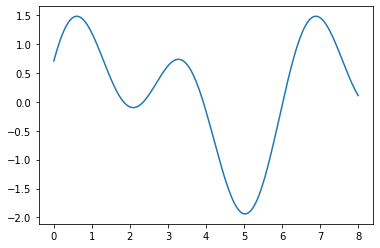

In [118]:
sampel_num = 200
testsample = np.int(sampel_num*0.2)
xhard_o = np.linspace(0,8,sampel_num)
yhard_o =np.sin(xhard_o) + np.sin(xhard_o*2+3.14/4)
xhard = np.linspace(0,8,sampel_num)
index = np.random.randint(0,sampel_num,testsample)
index = np.sort(index)
x_trainh = []
x_testh = []
for i in range(sampel_num):
  if i not in index:
    x_trainh.append(xhard[i])
  else:
    x_testh.append(xhard[i])

x_testh = np.array(x_testh)
y_testh = np.sin(x_testh) + np.sin(x_testh*2+3.14/4)

x_trainh = np.array(xtrain_h)
np.random.shuffle(x_trainh)
y_trainh = np.sin(x_trainh) + np.sin(x_trainh*2+3.14/4)


plt.plot(xhard_o,yhard_o)
plt.show()

###keras


Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 1.5809
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 1.3213
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 1.0642
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9549
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.9295
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8400
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7545
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5900
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5034
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4047
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3639
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3324
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

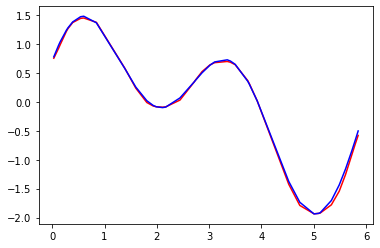

2/2 [==============================] - 0s 3ms/step - loss: 0.0015
0.0015397624811157584


In [117]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(50,activation='sigmoid'),
        tf.keras.layers.Dense(50,activation='sigmoid'),
        tf.keras.layers.Dense(20,activation='sigmoid'),
        tf.keras.layers.Dense(1,)
])
opt = tf.keras.optimizers.Adam(learning_rate=0.03)
model.compile(loss ='mean_squared_error',optimizer = opt)
history = model.fit(x_trainh,y_trainh,epochs=500)
p = model.predict(x_testh)
plt.plot(x_testh,p,'r')
plt.plot(x_testh,y_testh,'b')
plt.show()
print(model.evaluate(x_testh, y_testh))

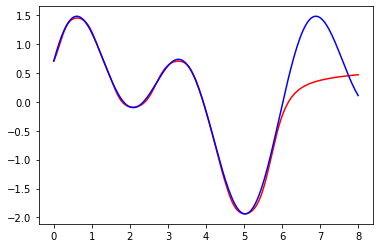

2/2 [==============================] - 0s 3ms/step - loss: 0.1965
0.19650337100028992


In [119]:
p = model.predict(xhard_o)
plt.plot(xhard_o,p,'r')
plt.plot(xhard_o,yhard_o,'b')
plt.show()
print(model.evaluate(x_testh, y_testh))

In [82]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 50)                100       
_________________________________________________________________
dense_104 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 51        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________
